In [3]:
from numpy import asarray
from sklearn.preprocessing import PolynomialFeatures

data = asarray([[2, 5, 6], [1, 2, 3]])
trans = PolynomialFeatures(degree=5)
data = trans.fit_transform(data)
print(data)

def polynomialFeatures(X, degree):
    result = X
    if(degree == 1):
        if 1 not in result:
            result = result.insert(0,1)
        return result
    elif(degree > 1):
        recursiveResult = polynomialFeatures(result, degree-1)
        for i in result:
            for j in result:
                degreeResult = i * j
                if(degreeResult not in result):
                    result.append(degreeResult)
        return result

print("next")
print(polynomialFeatures(data, 5))

[[1.000e+00 2.000e+00 5.000e+00 6.000e+00 4.000e+00 1.000e+01 1.200e+01
  2.500e+01 3.000e+01 3.600e+01 8.000e+00 2.000e+01 2.400e+01 5.000e+01
  6.000e+01 7.200e+01 1.250e+02 1.500e+02 1.800e+02 2.160e+02 1.600e+01
  4.000e+01 4.800e+01 1.000e+02 1.200e+02 1.440e+02 2.500e+02 3.000e+02
  3.600e+02 4.320e+02 6.250e+02 7.500e+02 9.000e+02 1.080e+03 1.296e+03
  3.200e+01 8.000e+01 9.600e+01 2.000e+02 2.400e+02 2.880e+02 5.000e+02
  6.000e+02 7.200e+02 8.640e+02 1.250e+03 1.500e+03 1.800e+03 2.160e+03
  2.592e+03 3.125e+03 3.750e+03 4.500e+03 5.400e+03 6.480e+03 7.776e+03]
 [1.000e+00 1.000e+00 2.000e+00 3.000e+00 1.000e+00 2.000e+00 3.000e+00
  4.000e+00 6.000e+00 9.000e+00 1.000e+00 2.000e+00 3.000e+00 4.000e+00
  6.000e+00 9.000e+00 8.000e+00 1.200e+01 1.800e+01 2.700e+01 1.000e+00
  2.000e+00 3.000e+00 4.000e+00 6.000e+00 9.000e+00 8.000e+00 1.200e+01
  1.800e+01 2.700e+01 1.600e+01 2.400e+01 3.600e+01 5.400e+01 8.100e+01
  1.000e+00 2.000e+00 3.000e+00 4.000e+00 6.000e+00 9.000e+00 8

In [4]:
#Step 2
import numpy as np

def mse(Y_test, Y_pred):
    return np.mean(pow((np.array(Y_test) - np.array(Y_pred)),2))
    
Y_test = [3, -0.5, 2, 7]
Y_pred = [2.5, 0.0, 2, 8]
mse(Y_test, Y_pred)

0.375

In [19]:
#Step 3

def partitionSplit(trainSetSize, folds):
    s_partition = []
    dfCopy = df
    #set the size for each partiton
    eachPartition = int(len(trainSetSize) / folds)
    for i in range(folds):
        partition = []
        #going through each partition
        for j in range(eachPartition):
            if(len(partition) < eachPartition):
                value = dfCopy.index[0]
                partition.append(value.tolist())
                dfCopy = dfCopy.drop(value)
        s_partition.append((np.asarray(partition)).tolist())
  
    return s_partition

def trainDataSize(df, train_size):
    s_partition = []
    trainSize = train_size
    dataSize = int(df.shape[0])

    while trainSize < dataSize:
        partition = []
        for i in range(trainSize):
            if(len(partition) < trainSize):
                    value = df.index[i]
                    partition.append(value.tolist())
        s_partition.append((np.asarray(partition)).tolist())
        trainSize+=train_size
  
    return s_partition

def learning_curve(model, X, Y, cv, train_size=10, learning_rate=0.01, epochs=1000, tol=None, regularizer=None, lambd=0.0):
    train_scores = [] 
    val_scores = []
    
    trainSetSize = trainDataSize(X, train_size)
    
    #loop to choose a partition as validation set
    for i, partition in enumerate(trainSetSize):
        
        splitX = partitionSplit(trainSetSize[i], cv)
            
        trainSet = list(splitX)
        del(trainSet[i])       #dropping the validation set
        trainSet = sum(trainSet, [])

        validationSet = []           #getting the validation set 
        for row in partition:
            validationSet.append(row)  #put data in validation set into a new list 
            
        #splitting the data into train and test set
        xTrainValues = []
        yTrainValues = []        
        for trainIndex in trainSet:
            xTrainValues.append(data.loc[trainIndex])
            yTrainValues.append(labels.loc[trainIndex])

        #splitting the validation set data into train and test set
        xValidationValues = []
        yValidationValues = []
        for testIndex in testSet:
            xValidationValues.append(data.loc[testIndex])
            yValidationValues.append(labels.loc[testIndex])
    
        #perform prediction using Linear Regression
        if model == 'Linear_Regression':
            modelRegression = Linear_Regression(xTrainValue, yTrainValue, learning_rate=0.01, epochs=1000, tol=None, regularizer=None,lambd=0.0,**kwargs)
            yTestPredict = modelRegression.predict(xValidationValues)
            
            train_error = mse(yValidationValues, yTestPredict)
            train_scores.append(train_error)
            
            yTrainPredict = modelRegression.predict(xTrainValues)
            
            validation_error = mse(yTrainValues, yTrainPredict)
            val_scores.append(validation_error)
    

In [106]:
#Step 5

class Linear_Regression: 
    
    # Storing the values as instance variables
    def __init__(self, learning_rate=0.01, epochs=1000, tol=None, regularizer=None, lambd=0.0):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.tol = tol
        self.regularizer = regularizer
        self.lambd = lambd
        
    def fit(self, X, Y):
        self.Y = Y
        self.cost = 0
#         bias = np.ones(shape=(len(X),1))
#         self.X = np.append(bias, X, axis=1)
#         self.X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)  #add a bias term into features
#         self.theta = np.zeros(X.shape[1] + 1)   #dimension of theta (d+1), where d is the number of features
        self.X = X
        self.theta = np.zeros(X.shape[1])
    
        for i in range(self.epochs):
            #lasso regression
            if self.regularizer == "l1": 
                self.lasso_regression()

            #ridge regression    
            elif self.regularizer == "l2": 
                self.ridge_regression()

            #None    
            else: 
                yPredict = self.predict(self.X)
                
                self.gradientVector = np.dot((self.learning_rate/len(self.X)), (np.dot((self.X.T), (yPredict-self.Y))))
                
                self.costFunction = self.learning_rate/(len(self.X)) * np.sum((self.Y-yPredict))
            
            #Update Weights
            self.theta = self.theta - self.gradientVector
            #Update Cost
            self.cost = abs(self.cost - self.costFunction)
            
            
            if self.tol is not None:
                if (self.cost < self.tol):
                    break
                   
        return self
    
    def lasso_regression(self):
        yPredict = self.predict(self.X)
        print(yPredict)
        self.gradientVector = np.dot((self.learning_rate/len(self.X)), (np.dot((self.X.T), (yPredict-self.Y))))-((self.learning_rate*self.lambd*np.sign(self.theta))/len(self.X))
            
        self.costFunction = self.learning_rate/(len(self.X)) * np.sum((self.Y-yPredict))
        
    def ridge_regression(self):
        yPredict = self.predict(self.X)
        
        self.gradientVector = np.dot((self.learning_rate/len(self.X)), (np.dot((self.X.T), (yPredict-self.Y))))-((self.learning_rate*self.lambd*self.theta)/len(self.X))
            
        self.costFunction = self.learning_rate/(len(self.X)) * np.sum((self.Y-yPredict))
        
    def predict(self, X):
        return np.dot(X, self.theta)


In [6]:
#Step 6
import pandas as pd

# Read the CSV as a Pandas Data Frame
df = pd.read_csv('winequality-red.csv', sep = ';', skipinitialspace=True)

In [7]:
#Step 7
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
#Step 8

#Shuffling the rows of the data
df = df.sample(frac=1) 
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
575,12.3,0.27,0.49,3.1,0.079,28.0,46.0,0.99930,3.20,0.80,10.2,6
1030,7.1,0.59,0.00,2.1,0.091,9.0,14.0,0.99488,3.42,0.55,11.5,7
866,6.8,0.49,0.22,2.3,0.071,13.0,24.0,0.99438,3.41,0.83,11.3,6
276,6.9,0.54,0.04,3.0,0.077,7.0,27.0,0.99870,3.69,0.91,9.4,6
750,8.3,0.65,0.10,2.9,0.089,17.0,40.0,0.99803,3.29,0.55,9.5,5


In [9]:
import numpy as np



[[572, 312], [1137, 1189], [593, 89], [143, 1529], [388, 1280]]


In [10]:
dataMatrix = df.to_numpy()
print(dataMatrix)

[[ 6.7   0.48  0.32 ...  0.53 12.7   7.  ]
 [ 6.4   0.27  0.45 ...  0.48  9.5   5.  ]
 [ 6.8   0.17  0.32 ...  0.66 12.    5.  ]
 ...
 [ 7.2   0.25  0.32 ...  0.44 10.5   5.  ]
 [ 6.4   0.24  0.26 ...  0.5   9.5   5.  ]
 [ 7.1   0.25  0.28 ...  0.41 10.5   5.  ]]


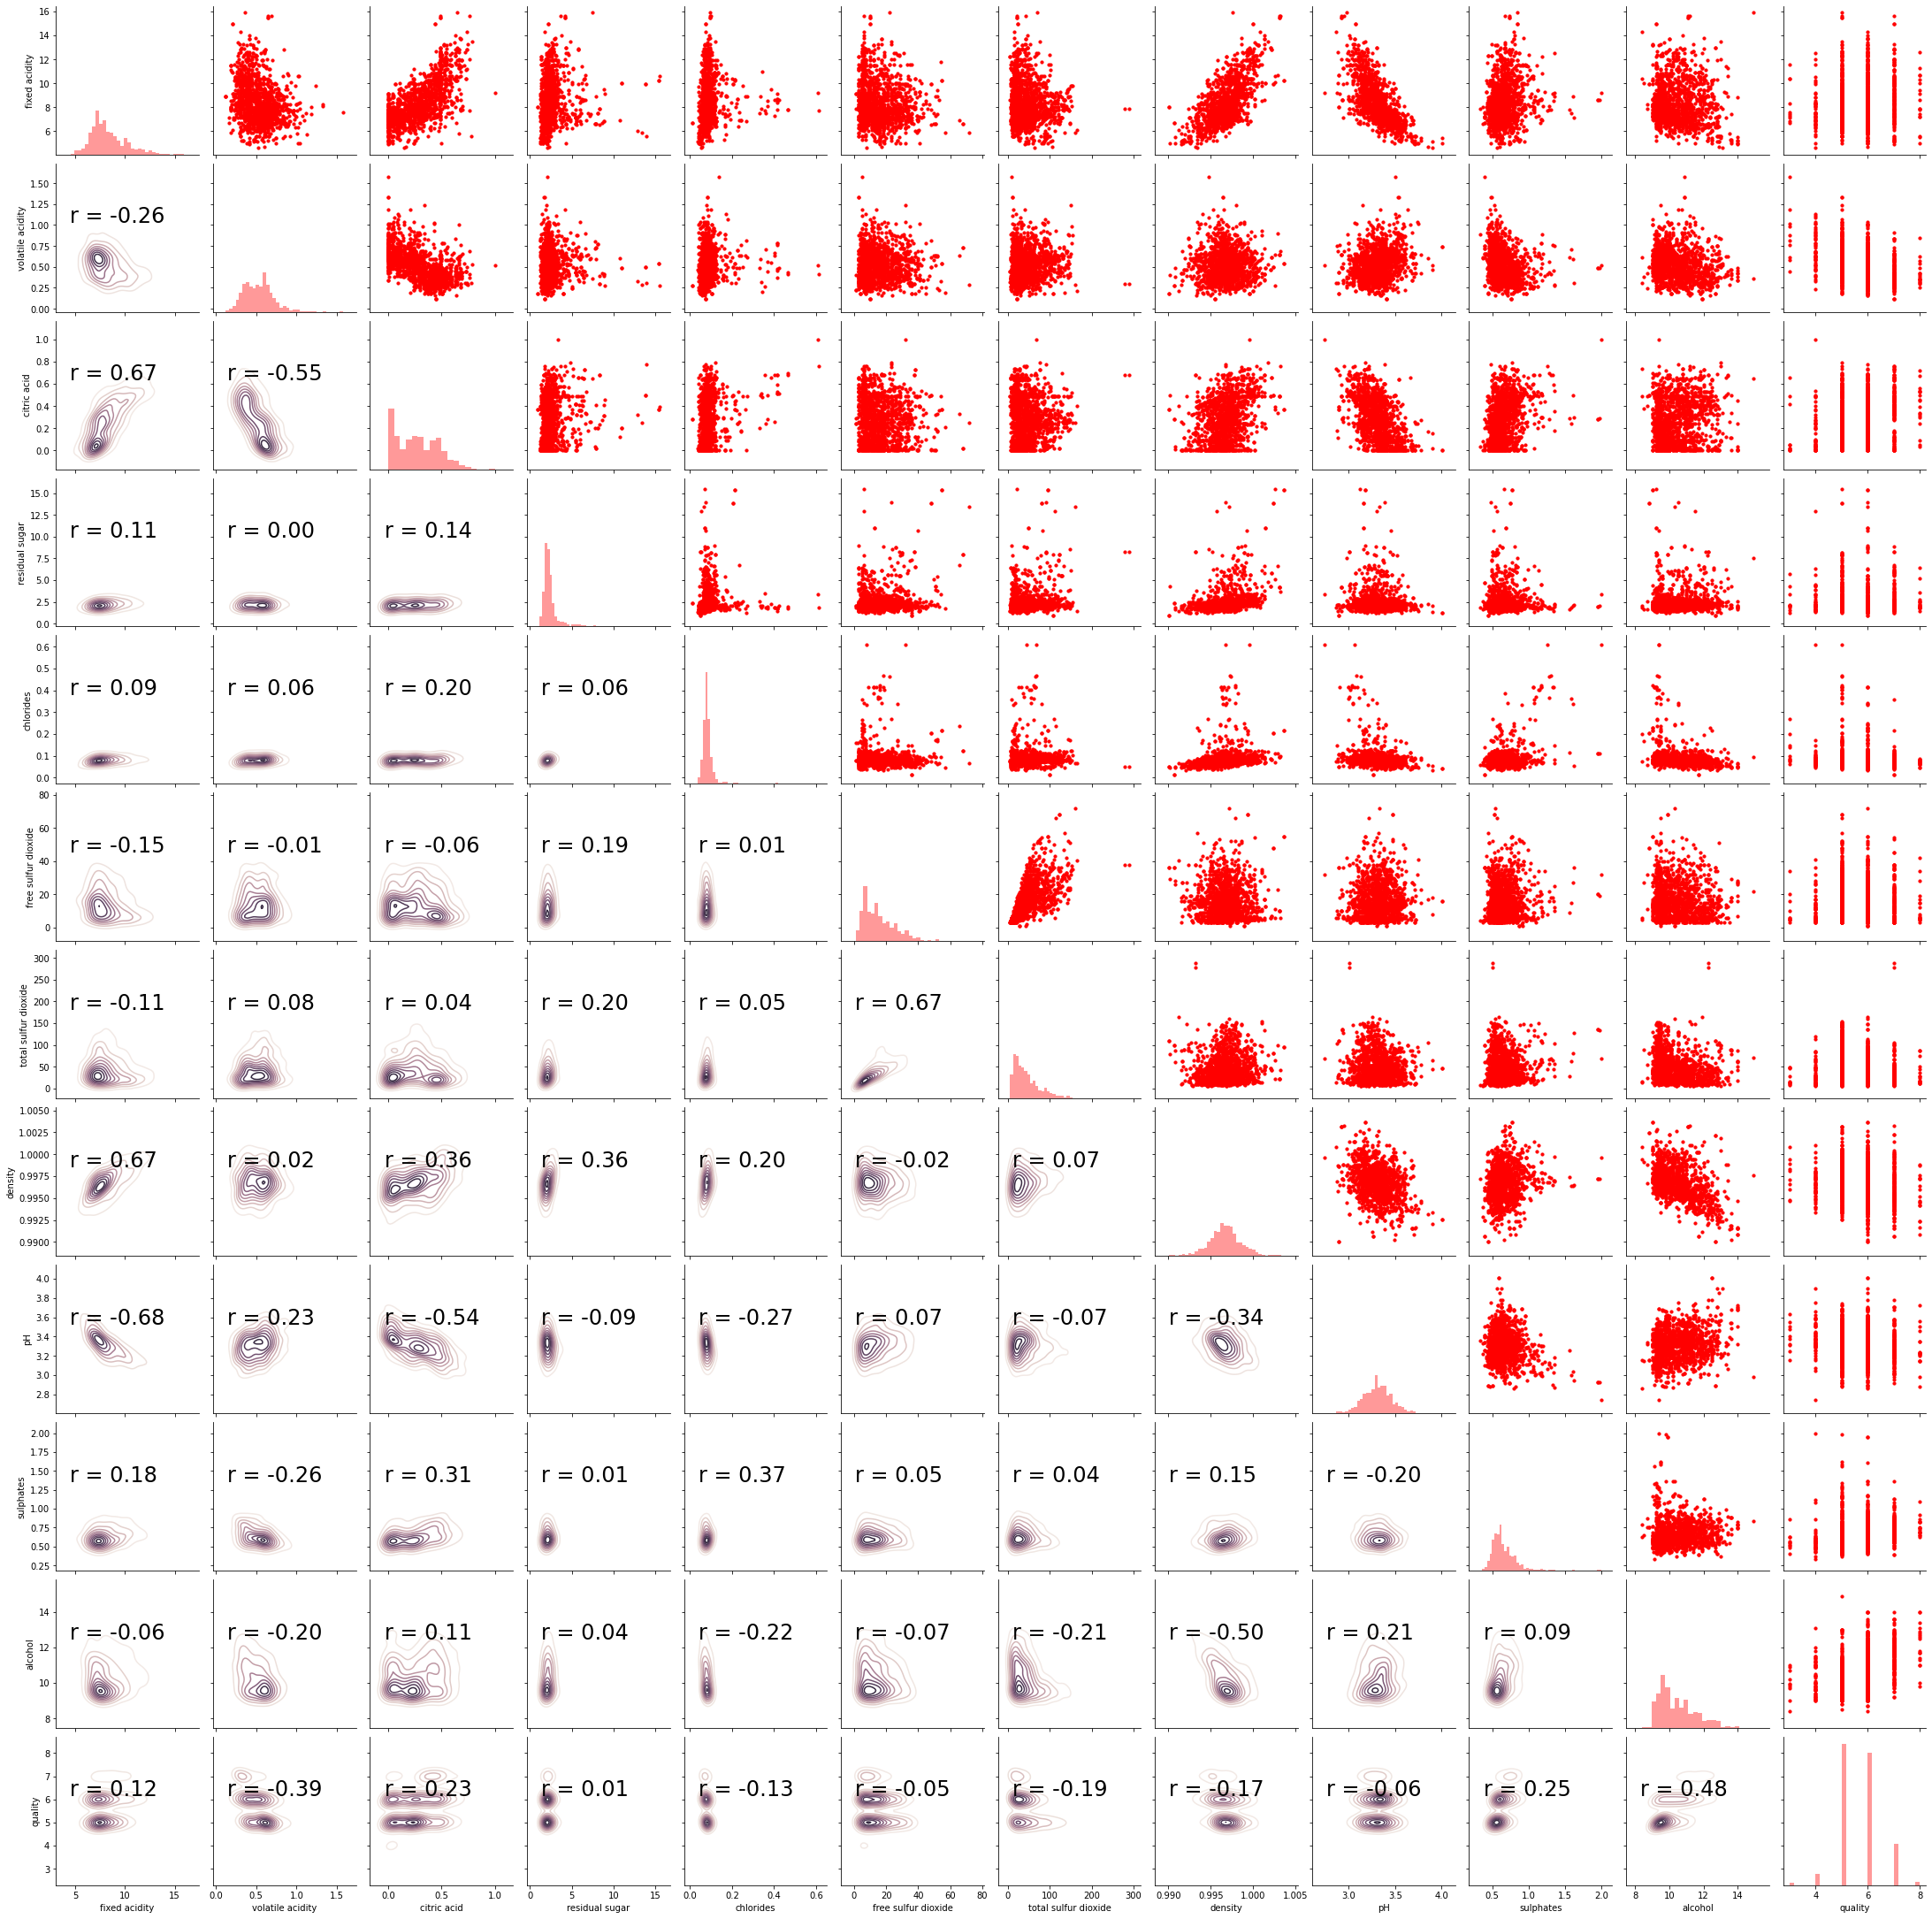

In [37]:
#Step 9

# Generating the pair plot using the seaborn package
import warnings
warnings.filterwarnings('ignore')

# Matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from scipy import stats

# Calculate correlation coefficient
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .6), xycoords=ax.transAxes,
               size = 24)
    
cmap = sns.cubehelix_palette(light=1, dark = 0.1,
                             hue = 0.5, as_cmap=True)

sns.set_context(font_scale=2)

# Pair grid set up
g = sns.PairGrid(df)

# Scatter plot on the upper triangle
g.map_upper(plt.scatter, s=10, color = 'red')

# Distribution on the diagonal
g.map_diag(sns.distplot, kde=False, color = 'red')

# Density Plot and Correlation coefficients on the lower triangle
g.map_lower(sns.kdeplot, cmap = cmap)
g.map_lower(corrfunc);

In [105]:
#Step 10

#function for the s-fold validation
def sFold(folds, data, labels, model, error_function, dictionary): 
    avgF1Score = [] 
    splitX = partitionSplit(data, folds)

    #loop to choose a partition as validation set
    for i, partition in enumerate(splitX):
        trainSet = list(splitX)
        del(trainSet[i])       #dropping the validation set
        trainSet = sum(trainSet, [])

        testSet = []           #getting the validation set 
        for row in partition:
            testSet.append(row)  #put data in validation set into a new list 
            
        #splitting the data into train and test set
        xTrainValues = []
        yTrainValues = []        
        for trainIndex in trainSet:
            xTrainValues.append(data.loc[trainIndex])
            yTrainValues.append(labels.loc[trainIndex])

        #splitting the validation set data into train and test set
        xTestValues = []
        yTestValues = []
        for testIndex in testSet:
            xTestValues.append(data.loc[testIndex])
            yTestValues.append(labels.loc[testIndex])
    
        #preform prediction using Linear Regression
        if model == 'Linear_Regression':
            modelClassifier = Linear_Regression(learning_rate = dictionary.get('learning_rate'), epochs=1, tol=None, regularizer = dictionary.get('regularizer'), lambd = dictionary.get('lambd'))
            modelClassifier.fit(np.array(xTrainValues), np.array(yTrainValues))
            yPredict= modelClassifier.predict(np.array(xTestValues))
            accuracy = sum(np.array(yPredict) == np.array(yTestValues)) / float(len(yTestValues))
            print('Accuracy: %.3f' %accuracy)
            
            #calculating the error using mse score
            if error_function == "mse":
                error = mse(yTestValues, yPredict)
                print("Lambda: %.3f" %dictionary.get('lambd'))
                print("Learning Rate: %.3f" %dictionary.get('learning_rate')) 
                print("Regularizer: %s" %dictionary.get('regularizer'))
                print('Error: %.3f' %error)
                print('\n')

y = df['quality'] #target vector
X = df.drop(columns='quality')
# bias = np.ones(shape=(len(X),1))
# X = np.append(bias, X, axis=1)
# X = np.array(X)


#function to pass the hyperparameter into s-fold validation
def dictionary(lambd, learning_rate, regularizer):
    modelArgs = dict()
    #form the dictionary
    for eachLambd in lambd:
        for eachLearningRate in learning_rate:
            for eachRegularizer in regularizer:
                modelArgs = {'lambd' : eachLambd, 'learning_rate' : eachLearningRate,'regularizer': eachRegularizer}
                #use of s-folds
                sFold(5, X, y, 'Linear_Regression', 'mse', modelArgs)
                
lambd = [1.0, 0,0.1,0.01, 0.001, 0.0001]
learning_rate = [0.1, 0.01, 0.001, 0.001]
regularizer = ['l1', 'l2']

dictionary(lambd,learning_rate,regularizer)

(1276,)
Accuracy: 0.000
Lambda: 1.000
Learning Rate: 0.100
Regularizer: l1
Error: 2860039.835


(1276,)
Accuracy: 0.000
Lambda: 1.000
Learning Rate: 0.100
Regularizer: l1
Error: 3132846.126


(1276,)
Accuracy: 0.000
Lambda: 1.000
Learning Rate: 0.100
Regularizer: l1
Error: 3145262.827


(1276,)
Accuracy: 0.000
Lambda: 1.000
Learning Rate: 0.100
Regularizer: l1
Error: 2840987.036


(1276,)
Accuracy: 0.000
Lambda: 1.000
Learning Rate: 0.100
Regularizer: l1
Error: 2526822.770


Accuracy: 0.000
Lambda: 1.000
Learning Rate: 0.100
Regularizer: l2
Error: 2860039.835


Accuracy: 0.000
Lambda: 1.000
Learning Rate: 0.100
Regularizer: l2
Error: 3132846.126


Accuracy: 0.000
Lambda: 1.000
Learning Rate: 0.100
Regularizer: l2
Error: 3145262.827




KeyboardInterrupt: 

In [ ]:
#Step 11

# From evaluating our model, we get the most optimum hyperparameters for: 
# lambd = , learning_rate = , regularizer =  
# Then we run the Linear Regression with those hyperparameters and get mean square error

X,y,t = separateTargetVector(dfStandard)
xTrain, xTest, yTrain, yTest = partition(X, y, t)
Linear_Regression(xTrainValues, yTrainValues, learning_rate, epochs=1000, tol=None, regularizer, lambd)
y_train_predict, probability = model.predict(xTest)
y_predict = np.array(y_train_predict)

print('Mean Square Error:', mse(yTest, y_predict))


In [64]:
#Step 12

train_scores, val_scores = learning_curve(model, X, Y, cv, train_size=10, learning_rate=0.01, 
                                          epochs=1000, tol=None, regularizer=None, lambd=0.0)

x = []
i = 0
while i <= len(X):
    x.append(i)
    i = i + train_size

#Plotting
fig = plt.figure(figsize=(10, 6))
plt.plot(x, val_scores, color='red', linewidth=8, linestyle='--')
plt.plot(x, train_scores, color='blue', linewidth=8, linestyle='--') 
plt.axis([0, len(X), 0, 1])
plt.title('Best Model Plot')
plt.xlabel('Traning Set Data')
plt.ylabel('RSME')
plt.show()


NameError: name 'model' is not defined

In [ ]:
#Step 13

polynomialFeatures(X, 3):
    
train_scores, val_scores = learning_curve(model, X, Y, cv, train_size=10, learning_rate=0.01, 
                                          epochs=1000, tol=None, regularizer=None, lambd=0.0)

x = []
i = 0
while i <= len(X):
    x.append(i)
    i = i + train_size

#Plotting
fig = plt.figure(figsize=(10, 6))
plt.plot(x, val_scores, color='red', linewidth=8, linestyle='--')
plt.plot(x, train_scores, color='blue', linewidth=8, linestyle='--') 
plt.axis([0, len(X), 0, 1])
plt.title('Best Model Plot')
plt.xlabel('Traning Set Data')
plt.ylabel('RSME')
plt.show()